# Welcome  

Notebook Author: Samuel Alter  
Notebook Subject: Capstone Project - Satellite Imagery

BrainStation Winter 2023: Data Science

In [17]:
# imports

import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
from usgs import api

# Set the EarthExplorer catalog
node = 'EE'# this indicates earth explorer website

# Set the Hyperion and Landsat 8 dataset
hyperion_dataset = 'EO1_HYP_PUB'
landsat8_dataset = 'LANDSAT_8'

# Set the scene ids
hyperion_scene_id = 'EO1H1820422014302110K2_SG1_01'
landsat8_scene_id = 'LC80290462015135LGN00'

# Submit requests to USGS servers
api.metadata(hyperion_dataset, node, [hyperion_scene_id])
api.metadata(landsat8_dataset, node, [landsat8_scene_id])

usgs.api.metadata(dataset, node, entityids, extended=False, api_key=None)

AttributeError: module 'usgs.api' has no attribute 'metadata'

In [2]:
# https://towardsdatascience.com/satellite-imagery-access-and-analysis-in-python-jupyter-notebooks-387971ece84b

In [14]:
from sentinelsat import SentinelAPI

user = 'sralter' 
password = 'rcy1qmr-btk1DFT1eba' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [15]:
import geopandas as gpd
import folium 

# santa monica bounds file named nReserve
nReserve = gpd.read_file('/Users/sra/Files/brainstation_2023_ds_capstone/brainstation_2023_ds_capstone/01_capstone_data/shapefiles/santa_monica_bounds/sm_bounds.geojson')

# empty base map in Folium centered around the bounding box
m = folium.Map([34.08483,-118.70617], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)
m

In [16]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry']:
    footprint = i

In [27]:
products = api.query(footprint,
                     #date = ('20190601', '20190626'),
                     date = ('20220101', '20221231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,15)
                    )

Querying products: 100%|█████████████████| 127/127 [00:00<00:00, 46.41product/s]


In [28]:
products

OrderedDict([('becdf74b-fb47-4010-84f1-2c271a501266',
              {'title': 'S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_20221224T213852',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('becdf74b-fb47-4010-84f1-2c271a501266')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('becdf74b-fb47-4010-84f1-2c271a501266')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('becdf74b-fb47-4010-84f1-2c271a501266')/Products('Quicklook')/$value",
               'summary': 'Date: 2022-12-24T18:38:01.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 988.32 MB',
               'ondemand': 'false',
               'generationdate': datetime.datetime(2022, 12, 24, 21, 38, 52),
               'beginposition': datetime.datetime(2022, 12, 24, 18, 38, 1, 24000),
               'endposition': datetime.datetime(2022, 12, 24, 18, 38, 1, 24000),
               'ingestiondate': datetime.datetime(2022,

In [29]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted
products_gdf

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
becdf74b-fb47-4010-84f1-2c271a501266,S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-24T18:38:01.024Z, Instrument: MS...",false,2022-12-24 21:38:52,2022-12-24 18:38:01.024,2022-12-24 18:38:01.024,2022-12-24 22:59:06.177,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20221224T213852_S2022...,S2A_OPER_MSI_L2A_TL_2APS_20221224T213852_A0392...,S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_2...,becdf74b-fb47-4010-84f1-2c271a501266,"MULTIPOLYGON (((-119.14887 33.33277, -117.9693..."
a6f892c6-bac0-49e8-85b6-3eb889cbdfb0,S2A_MSIL2A_20221224T183801_N0509_R027_T11SKT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-24T18:38:01.024Z, Instrument: MS...",false,2022-12-24 21:38:52,2022-12-24 18:38:01.024,2022-12-24 18:38:01.024,2022-12-24 22:54:13.887,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20221224T213852_S2022...,S2A_OPER_MSI_L2A_TL_2APS_20221224T213852_A0392...,S2A_MSIL2A_20221224T183801_N0509_R027_T11SKT_2...,a6f892c6-bac0-49e8-85b6-3eb889cbdfb0,"MULTIPOLYGON (((-119.73642 33.31985, -119.0438..."
b00b2190-4468-4070-980e-ebdee615d696,S2B_MSIL2A_20221219T183759_N0509_R027_T11SKT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-19T18:37:59.024Z, Instrument: MS...",false,2022-12-19 20:45:46,2022-12-19 18:37:59.024,2022-12-19 18:37:59.024,2022-12-19 23:10:37.845,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20221219T204546_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20221219T204546_A0302...,S2B_MSIL2A_20221219T183759_N0509_R027_T11SKT_2...,b00b2190-4468-4070-980e-ebdee615d696,"MULTIPOLYGON (((-119.74359 33.31970, -119.0438..."
12f20493-33a3-4d23-bbf4-9d666d673f12,S2B_MSIL2A_20221219T183759_N0509_R027_T11SLT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-19T18:37:59.024Z, Instrument: MS...",false,2022-12-19 20:45:46,2022-12-19 18:37:59.024,2022-12-19 18:37:59.024,2022-12-19 23:05:56.605,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20221219T204546_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20221219T204546_A0302...,S2B_MSIL2A_20221219T183759_N0509_R027_T11SLT_2...,12f20493-33a3-4d23-bbf4-9d666d673f12,"MULTIPOLYGON (((-119.14887 33.33277, -117.9693..."
6e9fd398-7016-4ec2-85c1-f4e7726284d6,S2A_MSIL2A_20221214T183801_N0509_R027_T11SLT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-14T18:38:01.024Z, Instrument: MS...",false,2022-12-14 22:05:00,2022-12-14 18:38:01.024,2022-12-14 18:38:01.024,2022-12-14 23:16:17.386,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20221214T220500_S2022...,S2A_OPER_MSI_L2A_TL_2APS_20221214T220500_A0390...,S2A_MSIL2A_20221214T183801_N0509_R027_T11SLT_2...,6e9fd398-7016-4ec2-85c1-f4e7726284d6,"MULTIPOLYGON (((-119.14887 33.33277, -117.9693..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0ec0053-8ff2-4556-bb57-4ce1c0f1f5a2,S2B_MSIL2A_20220106T184749_N0301_R070_T11SKT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 202

In [30]:
# api.download('becdf74b-fb47-4010-84f1-2c271a501266')

{'id': 'becdf74b-fb47-4010-84f1-2c271a501266',
 'title': 'S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_20221224T213852',
 'size': 1036361523,
 'md5': '99a9e1dc6c2dcac6e2b115317d57be69',
 'date': datetime.datetime(2022, 12, 24, 18, 38, 1, 24000),
 'footprint': 'POLYGON((-119.17378 34.3223655300343,-117.98062 34.3377366079947,-117.969376 33.347577738129736,-119.148865 33.3327671075422,-119.17378 34.3223655300343))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('becdf74b-fb47-4010-84f1-2c271a501266')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 12, 24, 23, 0, 0, 998000),
 'Ingestion Date': datetime.datetime(2022, 12, 24, 22, 59, 6, 177000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('becdf74b-fb47-4010-84f1-2c271a501266')/Products('Quicklook')/$value",
 'path': 'S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_20221224T213852.zip',
 'downloaded_bytes': 1036361523}

In [1]:
import rasterio

R10 = '/Users/sra/Files/brainstation_2023_ds_capstone/brainstation_2023_ds_capstone/01_capstone_data/notebooks/S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_20221224T213852.SAFE/GRANULE/L2A_T11SLT_A039206_20221224T184116/IMG_DATA/R10m'
b4 = rio.open(R10+'/T11SLT_20221224T183801_B04_10m.jp2')
b3 = rio.open(R10+'/T11SLT_20221224T183801_B03_10m.jp2')
b2 = rio.open(R10+'/T11SLT_20221224T183801_B02_10m.jp2')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

ModuleNotFoundError: No module named 'rasterio'

# Clip raster to polygon

In [5]:
import shapely

In [6]:
shapely.geos.geos_version

(3, 9, 1)

In [15]:
# first, merge perimeters
# https://stackoverflow.com/questions/61035170/merging-polygon-shapefiles-in-python

# this was done in QGIS for now. View merged perimeters, 
# to confirm only one polygon in the dataset
sm_perim_merge=gpd.read_file('/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/perimeters_sm/santa_monica_fire_perimeters_le2018_merge.geojson')
sm_perim_merge

,OBJECTID,MAP_METHOD,DATE_CUR,COMMENTS,GEO_ID,IRWINID,UNQE_FIRE_,FIRE_YEAR,LOCAL_NUM,INCIDENT,...,GIS_ACRES,USER_NAME,SOURCE,AGENCY,FIRE_YEAR_,Shape__Are,Shape__Len,layer,path,geometry
0,4751,Mixed Collection Methods,20070508,NPS from BARC imagery and air photo interp. Pr...,21990,None,2007-CALAC-00000000,2007,00000000,GRIFFITH PARK,...,747.8984,None,CalFire FRAP,LRA,2007,4427910.25,15010.918614,santa_monica_fire_perimeters_le2018,/Users/sra/Desktop/Data_Science_2023/_capstone...,"MULTIPOLYGON (((-118.29503 34.13812, -118.2951..."


In [43]:
# get coordinates from geometry of sm_perim_merge

sm_perim_merge['geometry']

0    MULTIPOLYGON (((-118.29503 34.13812, -118.2951...
Name: geometry, dtype: geometry

ERROR 1: Failed to identify source layer from datasource.


TypeError: Image data of dtype object cannot be converted to float

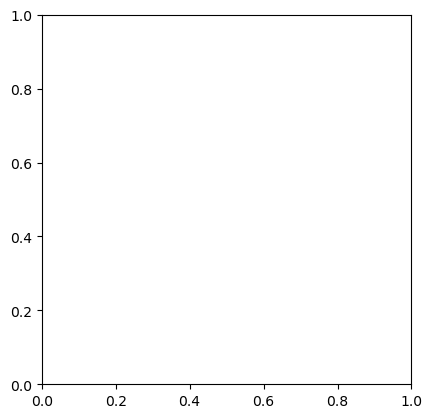

In [19]:
# https://opensourceoptions.com/blog/how-to-clip-a-raster-to-a-polygon-or-an-extent-with-python-extract-by-mask/

import gdal

fn_in = r"/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip.tif"
fn_clip = '/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_sm_fire.tif'
fn_poly = r"path/to/polygon.gpkg"

# gdal.Warp(fn_clip, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True)

# from osgeo import gdal
# fn_in = r"..\..\course-gdal-python\data\input\USGS_one_meter_x64y486_ID_FEMAHQ_2018.tif"
fn_in=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip.tif'

# fn_poly = r"..\..\course-gdal-python\data\input\polygon.gpkg"
fn_poly=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/perimeters_sm/santa_monica_fire_perimeters_le2018_merge.geojson'

# fn_clip = '../data/output/clip_polygon.tif'
fn_clip='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip_fire.tif'


ortho_fire=gdal.Warp(fn_clip, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True)
plt.imshow(ortho_fire)
# gdal.Warp(fn_clip2, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=False)
# where = "ID = '1'"
# gdal.Warp(fn_clip_where1, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True, cutlineWhere=where)
# where = "ID = '2'"
# gdal.Warp(fn_clip_where2, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True, cutlineWhere=where)

In [30]:
# https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html

# imports
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

# filepaths
fp=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip.tif'
out_tif=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip_fire.tif'

# plot raster
data=rasterio.open(fp)

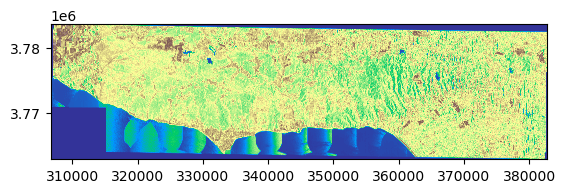

<Axes: >

In [31]:
show((data,4),cmap='terrain')

In [33]:
# try to insert geometry into a geodataframe

polygon='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/perimeters_sm/santa_monica_fire_perimeters_le2018_merge.geojson'

geo=gpd.GeoDataFrame({'geometry':polygon},index=[0],crs=from_epsg(4326))

/Applications/Anaconda/anaconda3/envs/gis/lib/python3.10/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_5467/978435861.py:5: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  geo=gpd.GeoDataFrame({'geometry':polygon},index=[0],crs=from_epsg(4326))


In [35]:
# try to re-project into the same coordinate system as the raster data

geo = geo.to_crs(crs=data.crs.data)

AttributeError: 'Series' object has no attribute 'to_crs'

In [36]:
# get coordinates of the geometry in a format that rasterio wants them
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [38]:
coords = getFeatures(geo)
print(coords)

AttributeError: 'str' object has no attribute '__geo_interface__'

In [39]:
# Now we are ready to clip the raster with the polygon 
# using the coords variable that we just created. 
# Clipping the raster can be done easily with the mask function 
# that we imported in the beginning from rasterio, and specifying clip=True.

out_img, out_transform = mask(raster=data, shapes=coords, crop=True)

NameError: name 'coords' is not defined